In [21]:
# Checking Version of Tensorflow ...
# importing various libraries like matplotlib for data visualization and numpy for numerical computations
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.12.0'

In [22]:
# using Mnist dataset with comes with tensorflow..
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(len(x_train), len(x_test))

60000 10000


In [23]:
#printing shape of x_train and y_train
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


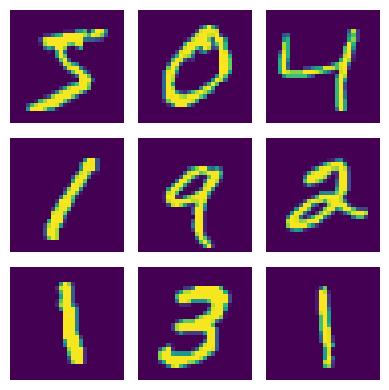

In [24]:
#here created the universal funtion for showing data
def display(data):
  fig, axes = plt.subplots(3, 3, figsize=(4, 4))
  axes = axes.flatten()
  for i in range(9):
      axes[i].imshow(data[i])
      axes[i].axis('off')

  plt.tight_layout()
  plt.show()

display(x_train)

In [25]:
# This is preprocessing pipeline
print(x_train.shape)
# Normalize the pixel values between 0 and 1
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the input data to include the channel dimension (for CNN)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

# Convert the labels to categorical format since we are using softmax activation
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


print(y_train.shape)

(60000, 28, 28)
(60000, 10)


In [26]:
def create_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
  ])
  return model

model = create_model() # creating the model..

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])  # adam optimizer is a adaptive gradient descent technique..
# Training the model...
model.fit(x_train, y_train, batch_size=128, epochs=5, validation_split=0.1) # This is basically a mini batch gradient discent..


Epoch 1/5
422/422 [==============================] - 50s 116ms/step - loss: 0.2378 - accuracy: 0.9343 - val_loss: 0.0810 - val_accuracy: 0.9783
Epoch 2/5
422/422 [==============================] - 32s 76ms/step - loss: 0.0723 - accuracy: 0.9785 - val_loss: 0.0571 - val_accuracy: 0.9848
Epoch 3/5
422/422 [==============================] - 31s 74ms/step - loss: 0.0477 - accuracy: 0.9855 - val_loss: 0.0553 - val_accuracy: 0.9848
Epoch 4/5
422/422 [==============================] - 33s 77ms/step - loss: 0.0339 - accuracy: 0.9896 - val_loss: 0.0519 - val_accuracy: 0.9877
Epoch 5/5
422/422 [==============================] - 31s 75ms/step - loss: 0.0263 - accuracy: 0.9924 - val_loss: 0.0511 - val_accuracy: 0.9862


In [27]:
# getting test loss and accuracy
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 3s 9ms/step - loss: 0.0485 - accuracy: 0.9842
Test Loss: 0.0485
Test Accuracy: 0.9842


313/313 [==============================] - 3s 9ms/step
(10000, 10)
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.98      0.99      1010
           4       0.96      1.00      0.98       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Confusion Matrix:
[[ 976    1    0    0    0    1    1    1    0    0]
 [   0 1132    1    1    0    0    1    0    0    0]
 [   2    8 1000    2    3 

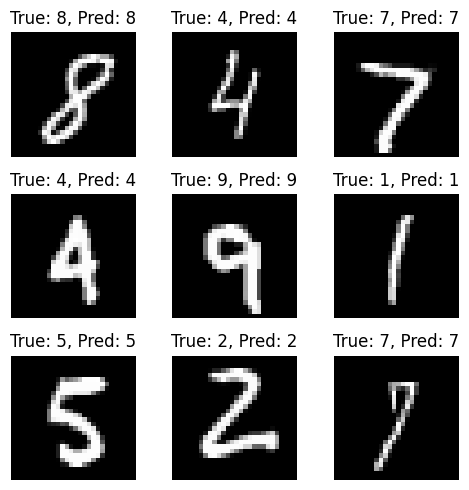

In [28]:
# Here is predictions
y_pred = model.predict(x_test)
print(y_pred.shape)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
from sklearn.metrics import classification_report, confusion_matrix
classification_metrics = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:")
print(classification_metrics)

# Confusion matrix
confusion_mat = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(confusion_mat)

# Visualize a random sample of predictions
sample_indices = np.random.choice(len(x_test), size=9, replace=False)
sample_images = x_test[sample_indices]
sample_labels_true = y_true_classes[sample_indices]
sample_labels_pred = y_pred_classes[sample_indices]

plt.figure(figsize=(5, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap="gray")
    plt.title(f"True: {sample_labels_true[i]}, Pred: {sample_labels_pred[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()